# **Santander's Customer Satisfaction**

## Exploratory Data Analysis

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
files.upload()

Saving train.csv to train.csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
train_dummy = train.copy()

**Used a copy of dataset so that original dataset remains unchannged.**

In [ ]:
train_dummy.head(7)

In [ ]:
train_dummy.describe()

**Summary of dataset.**

Here are the inferences made:

1. All values are numeric.
2. Multiple columns have only zeros in all the rows.
3. Some duplicate columns are also there like "imp_op_var41_efect_ult1" and "imp_op_var39_efect_ult1".
4. Need impute/remove outliers.
5. Normalisation of data is required.

In [ ]:
train_dummy.dtypes

**Datatypes of columns(All columns are not shown because of large dataset).**

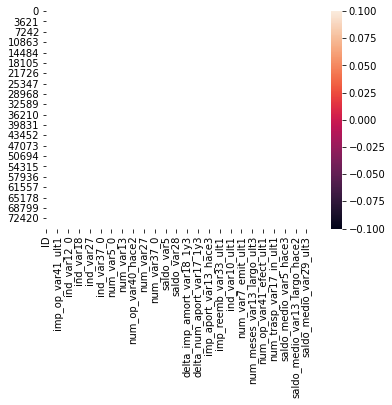

In [ ]:
sns.heatmap(train_dummy.isnull())

**No missing value in dataset.**

In [ ]:
train_dummy.isnull().sum()

In [ ]:
train_dummy.info()

In [ ]:
train_dummy['TARGET'].unique()

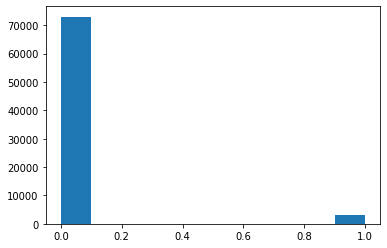

In [ ]:
target = train_dummy.TARGET
plt.hist(target)
plt.show()

**There are more no. of "0" than "1" in the target side.That means more customers are satified.**

In [ ]:
c1=0
c2=0
for i in train_dummy.TARGET:
  if i==0:
    c1+=1
  elif i==1:
    c2+=1

x=c1/(c1+c2)

print("No. of 0s in target: "+str(c1))
print("No. of 1s in target: "+str(c2))
print("Percentage of customer satisfied: "+str(x*100)+"%")

No. of 0s in target: 73012
No. of 1s in target: 3008
Percentage of customer satisfied: 96.0431465403841%


**Almost 96% of total customers are satisfied.**

Hence Dataset is unbalanced.

In [ ]:
zero_col=[]
for col in train_dummy:
  c=0
  for data in train_dummy[col]:
    if data!=0:
      c+=1
  if c==0:
    zero_col.append(col)
    print(col+" has all zero values")
    print("===============================================")
print(zero_col)

ind_var2_0 has all zero values
ind_var2 has all zero values
ind_var27_0 has all zero values
ind_var28_0 has all zero values
ind_var28 has all zero values
ind_var27 has all zero values
ind_var41 has all zero values
ind_var46_0 has all zero values
ind_var46 has all zero values
num_var27_0 has all zero values
num_var28_0 has all zero values
num_var28 has all zero values
num_var27 has all zero values
num_var41 has all zero values
num_var46_0 has all zero values
num_var46 has all zero values
saldo_var28 has all zero values
saldo_var27 has all zero values
saldo_var41 has all zero values
saldo_var46 has all zero values
imp_amort_var18_hace3 has all zero values
imp_amort_var34_hace3 has all zero values
imp_reemb_var13_hace3 has all zero values
imp_reemb_var33_hace3 has all zero values
imp_trasp_var17_out_hace3 has all zero values
imp_trasp_var33_out_hace3 has all zero values
num_var2_0_ult1 has all zero values
num_var2_ult1 has all zero values
num_reemb_var13_hace3 has all zero values
num_reem

In [ ]:
train_dummy = train_dummy.drop(columns=zero_col)

**All columns having only 0s are dropped from data set.**

In [ ]:
train_dummy.shape

(76020, 337)

**Hence, dataset size became less.**

In [ ]:
duplicate_columns = []
colu = train_dummy.columns
counter = 0
for i in range(len(colu)-1):
  val = train_dummy[colu[i]].values
  for j in range(i+1,len(colu)):
    if np.array_equal(val,train_dummy[colu[j]].values):
      duplicate_columns.append(colu[j])
      counter+=1
print("Duplicate columns in the dataset: ",duplicate_columns)
print("No. of duplicate columns: ",counter)

Duplicate columns in the dataset:  ['ind_var29_0', 'ind_var29', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29_0', 'num_var29', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3']
No. of duplicate columns:  29


**So, We need to remove all 29 duplicate columns too.**

In [ ]:
train_dummy = train_dummy.drop(columns= duplicate_columns)

**All 29 columns have been dropped.**

In [ ]:
train_dummy.shape

(76020, 308)

**Size after dropping duplicate columns.**

In [ ]:
cor = train_dummy.corr()
print(cor)

                               ID      var3  ...     var38    TARGET
ID                       1.000000 -0.001025  ... -0.005687  0.003148
var3                    -0.001025  1.000000  ...  0.000071  0.004475
var15                   -0.002135 -0.004452  ...  0.006497  0.101322
imp_ent_var16_ult1      -0.003111  0.001868  ...  0.000007 -0.000017
imp_op_var39_comer_ult1 -0.001436  0.005989  ...  0.012546  0.010353
...                           ...       ...  ...       ...       ...
saldo_medio_var44_hace3 -0.003674  0.000508  ...  0.003646 -0.002553
saldo_medio_var44_ult1  -0.000856  0.000738  ...  0.003258 -0.003104
saldo_medio_var44_ult3   0.000297  0.000778  ...  0.003037 -0.003015
var38                   -0.005687  0.000071  ...  1.000000 -0.019510
TARGET                   0.003148  0.004475  ... -0.019510  1.000000

[308 rows x 308 columns]


**Correlation coefficients of all columns.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


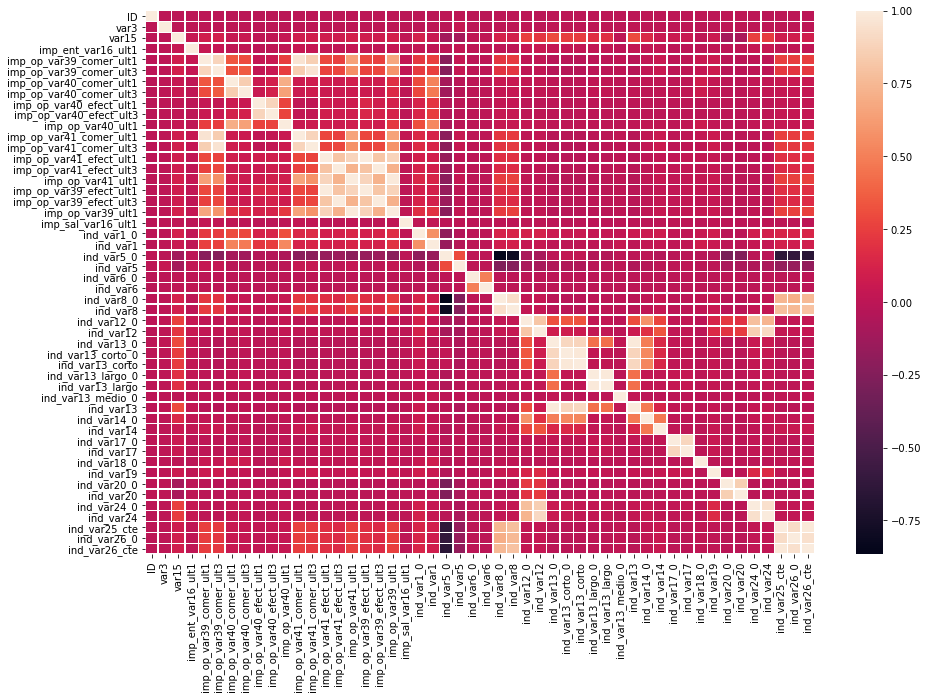

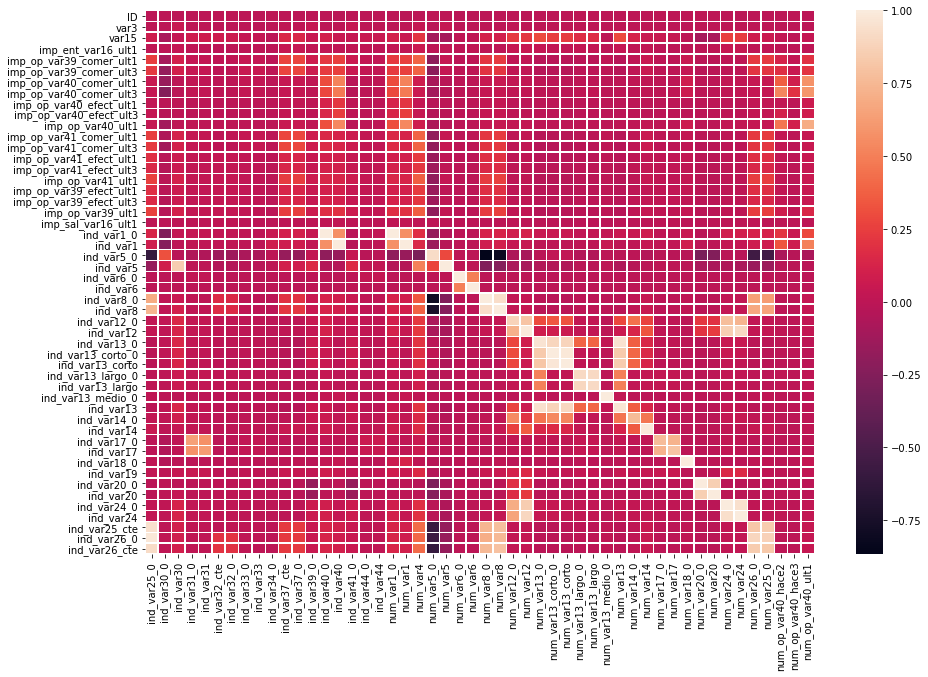

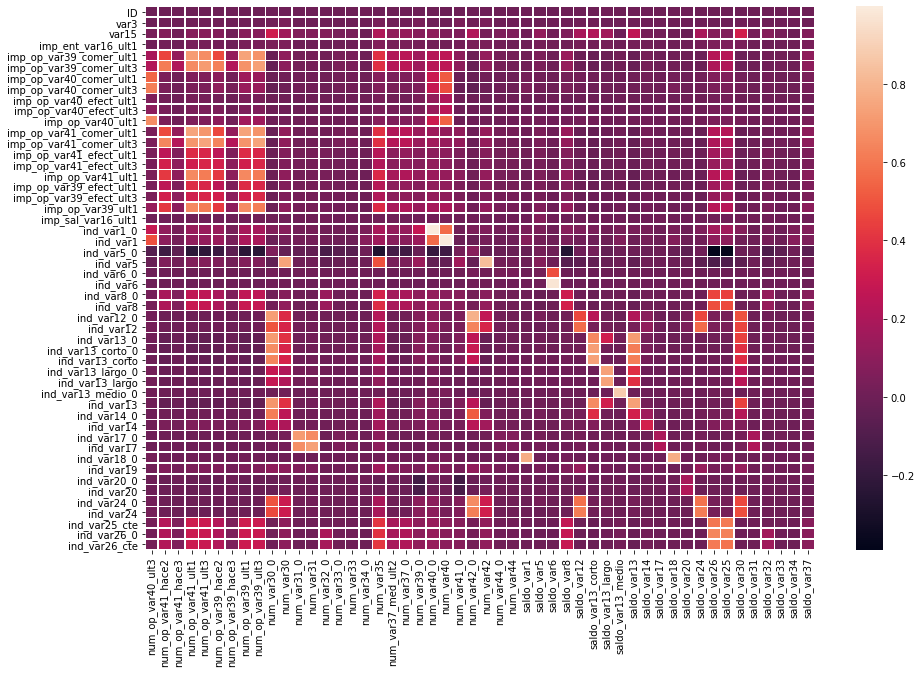

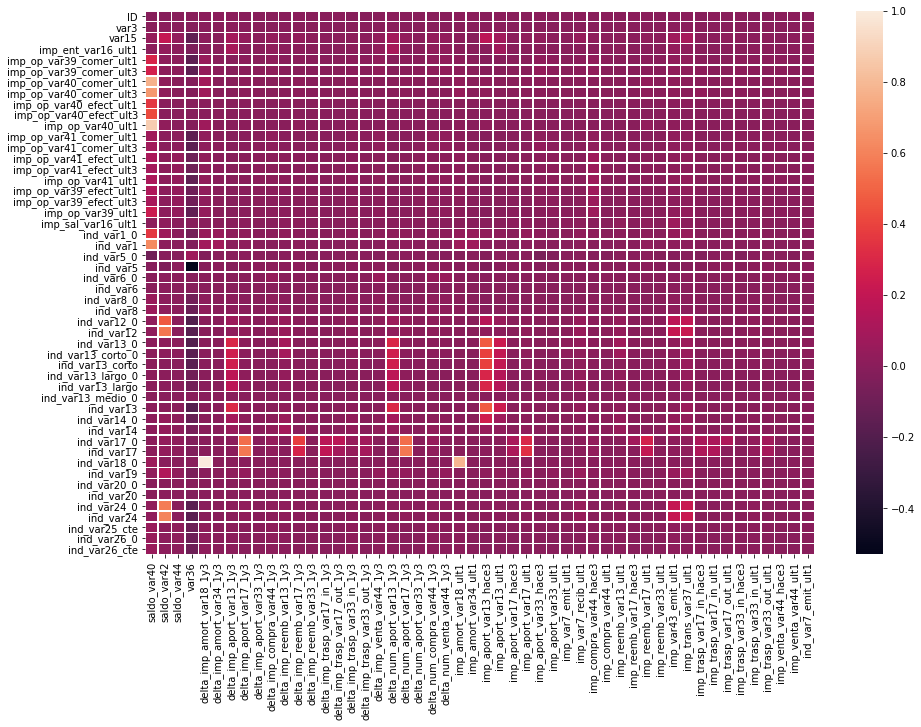

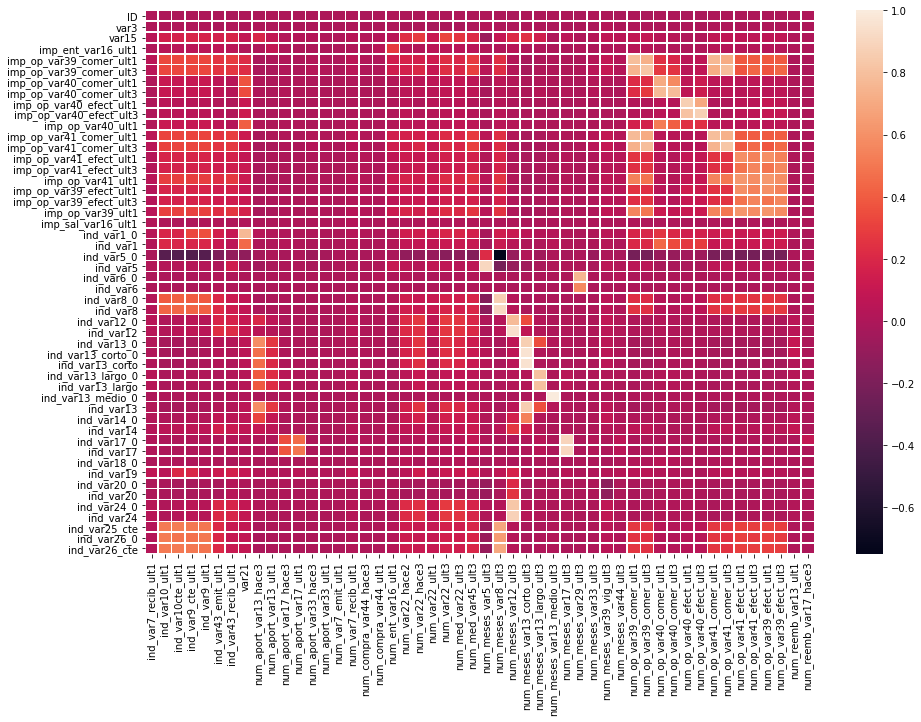

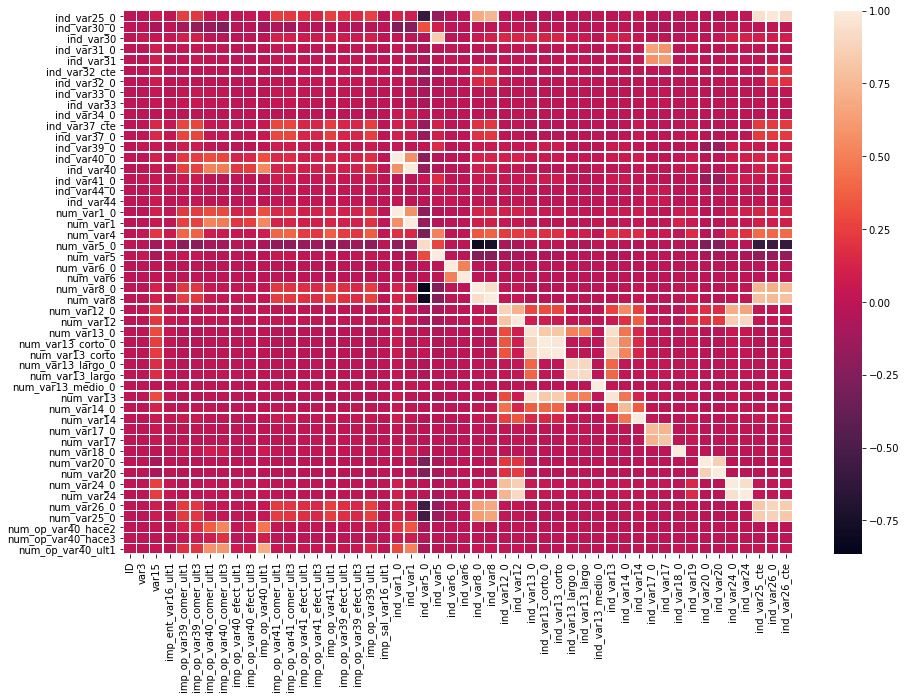

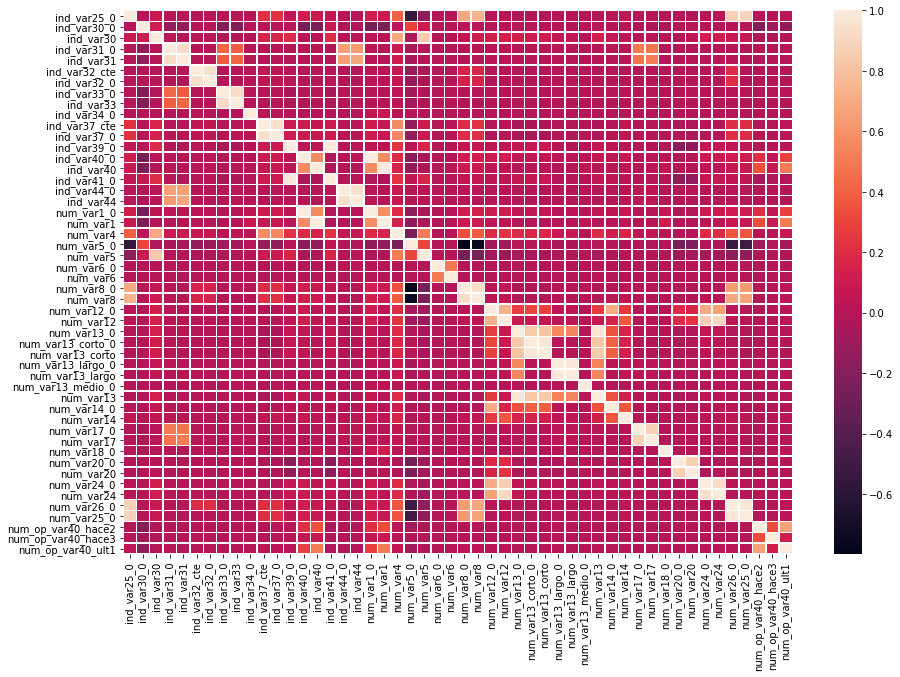

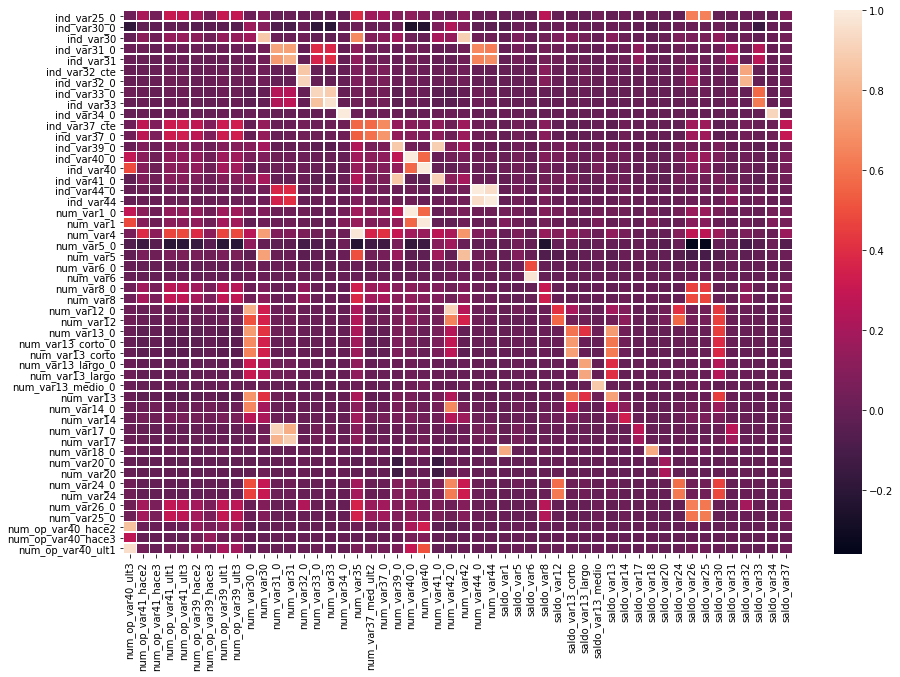

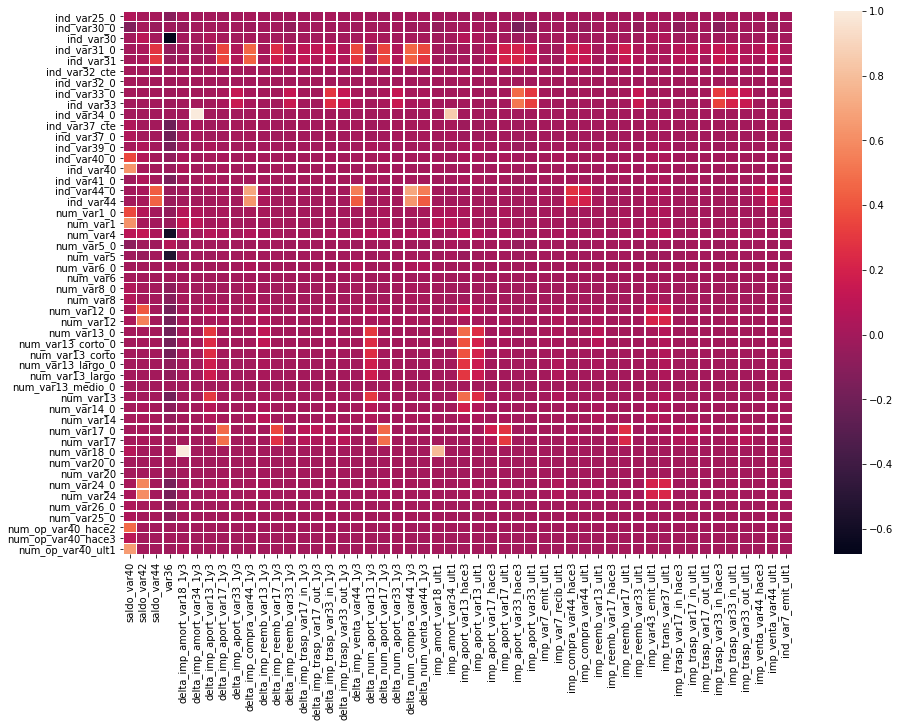

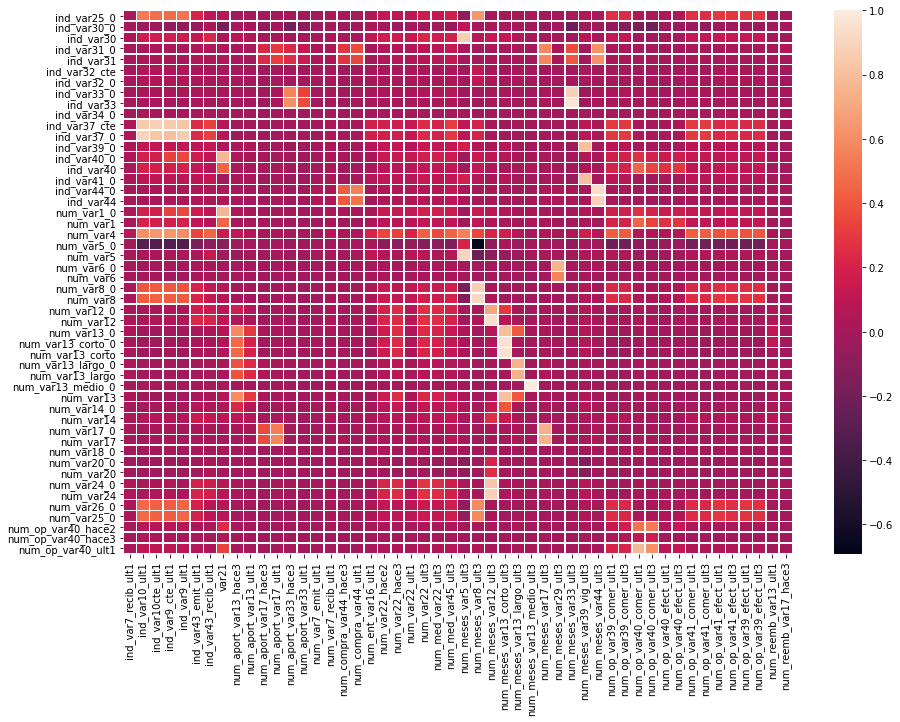

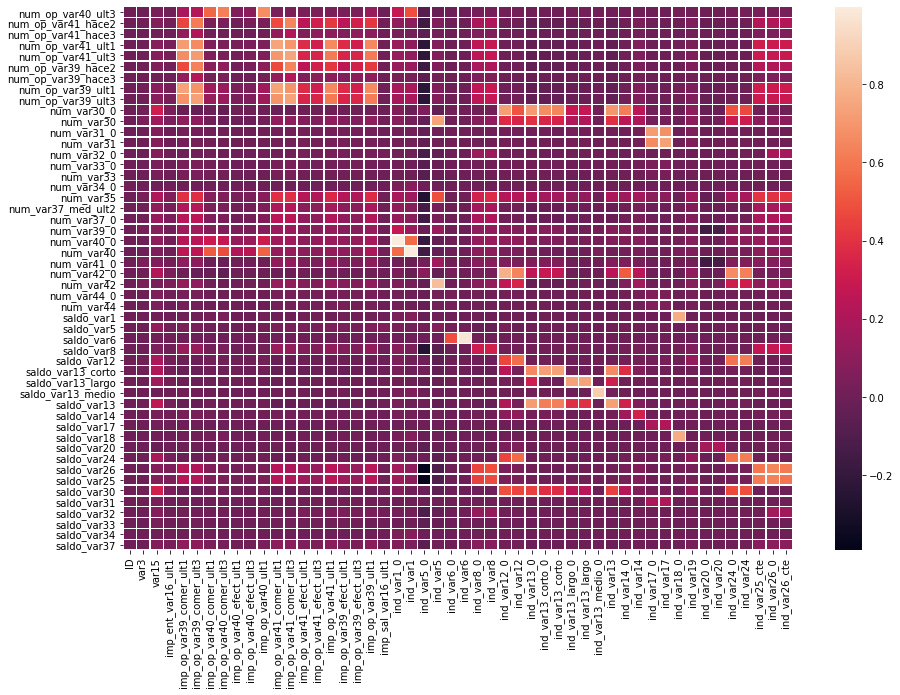

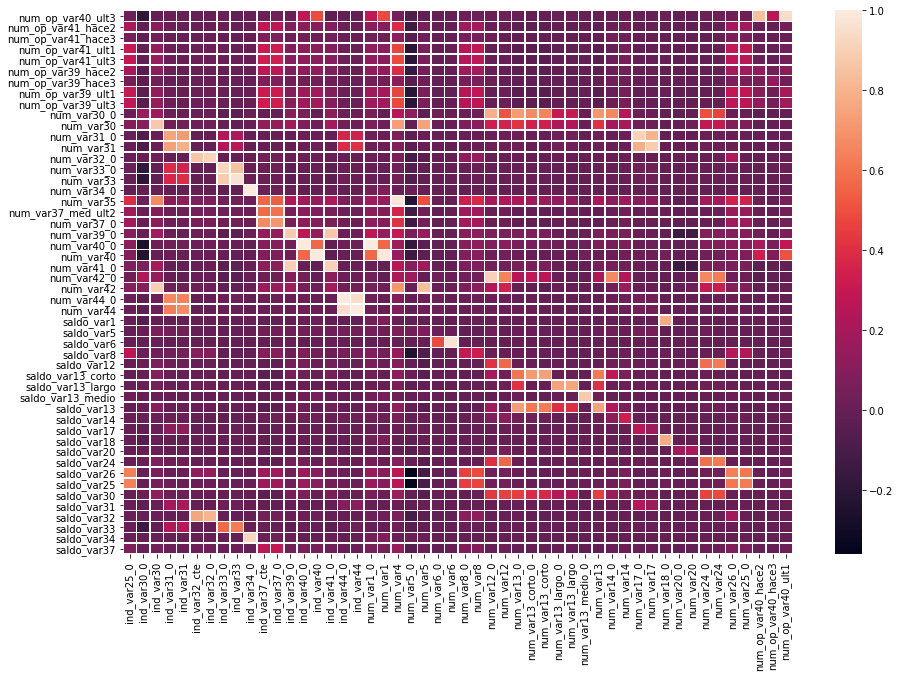

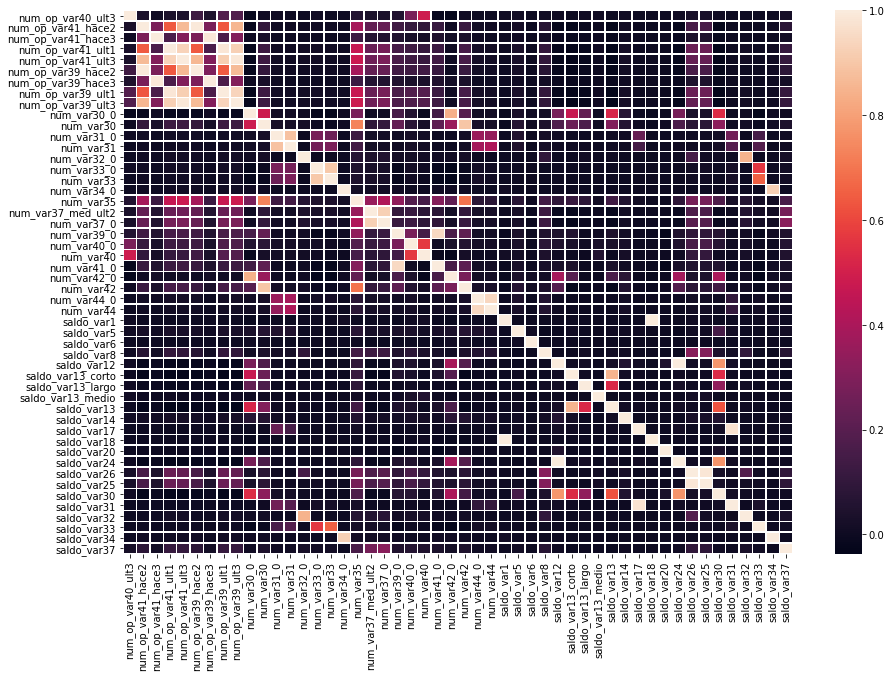

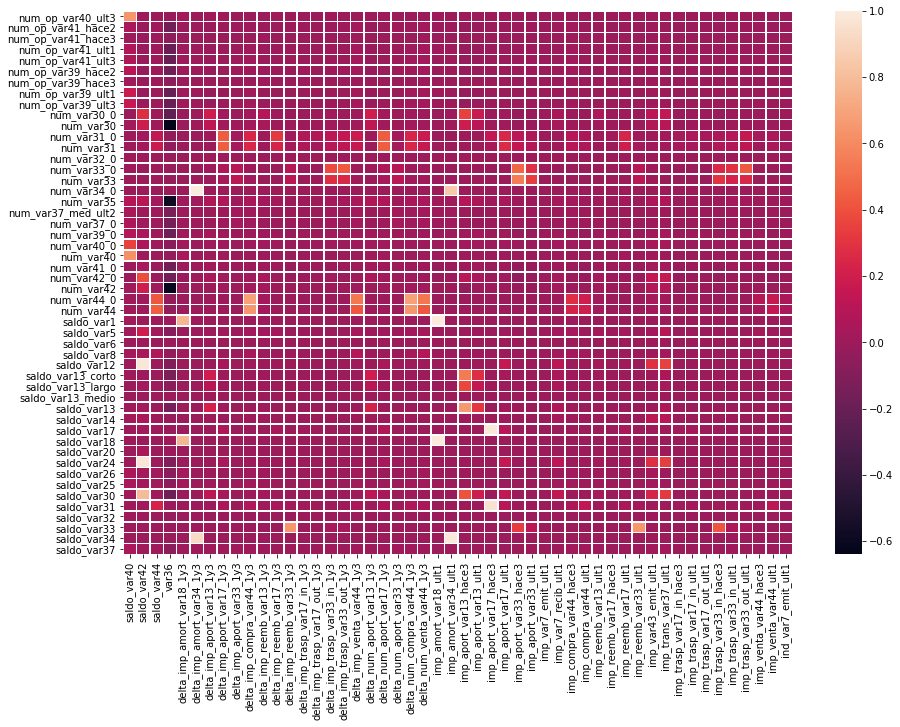

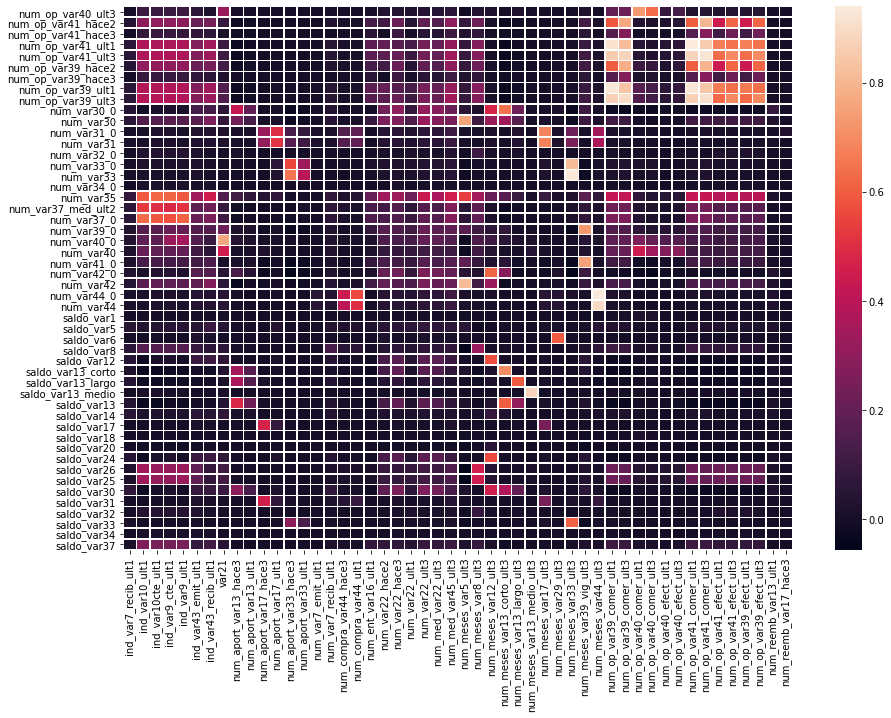

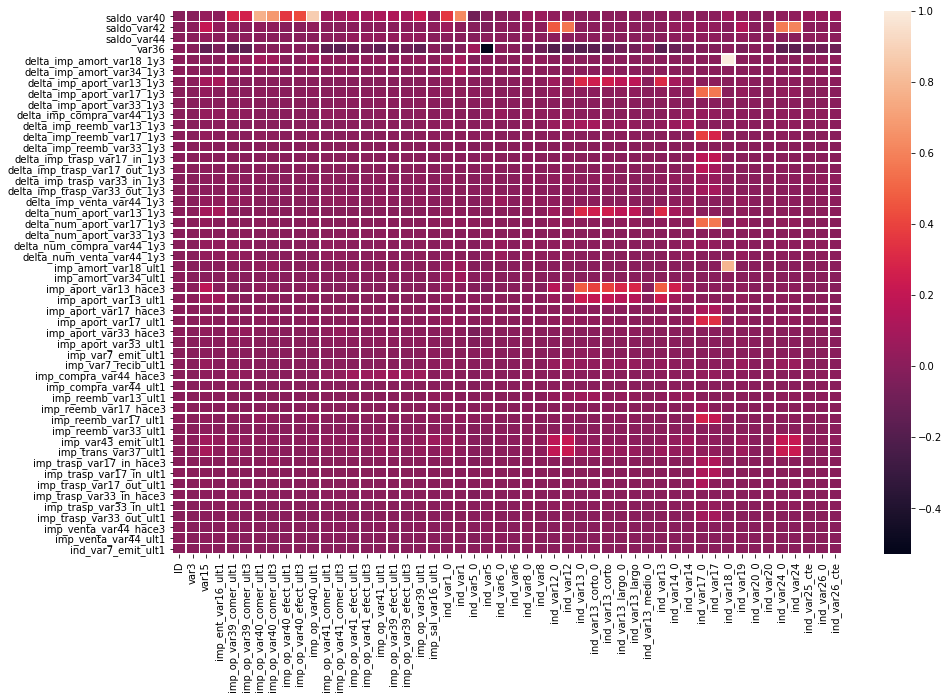

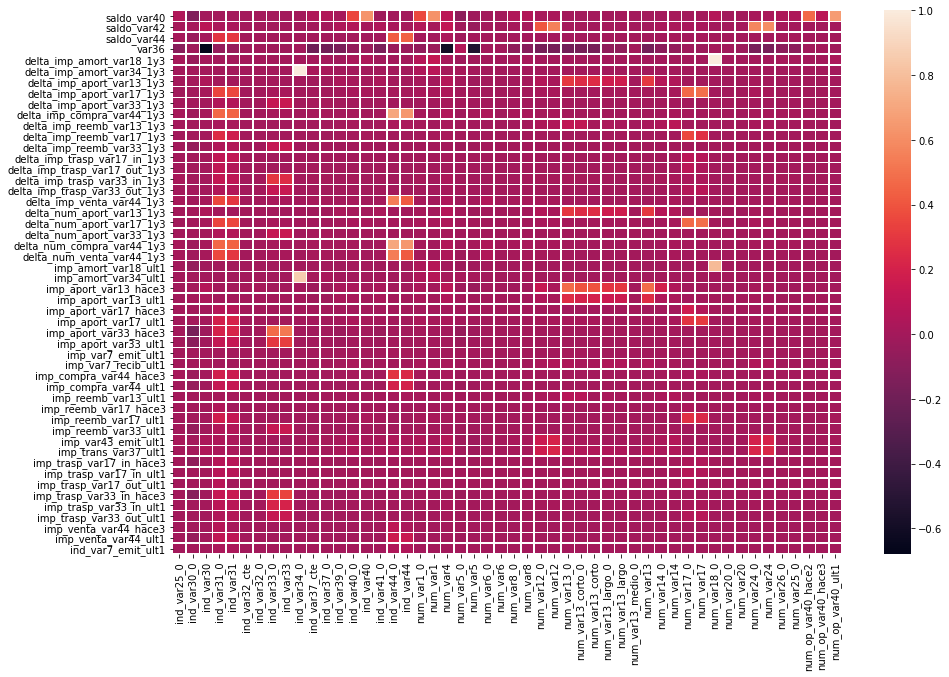

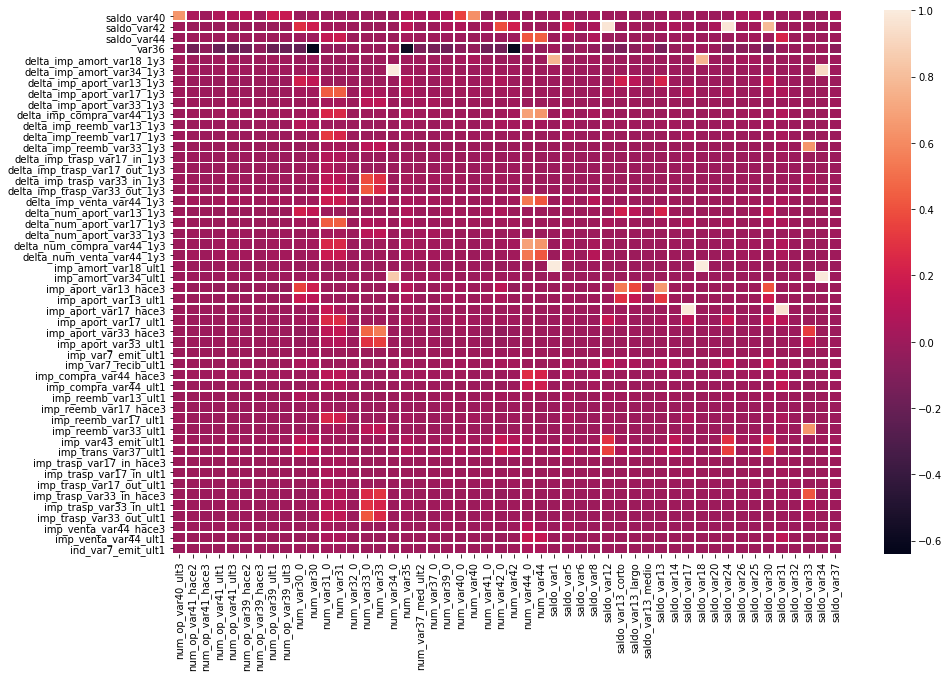

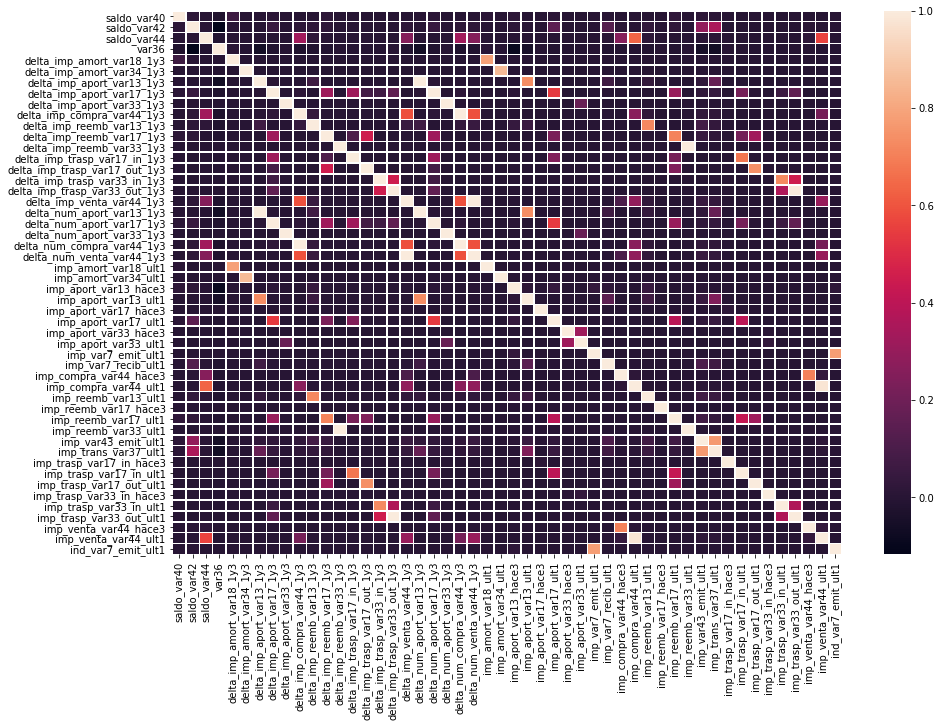

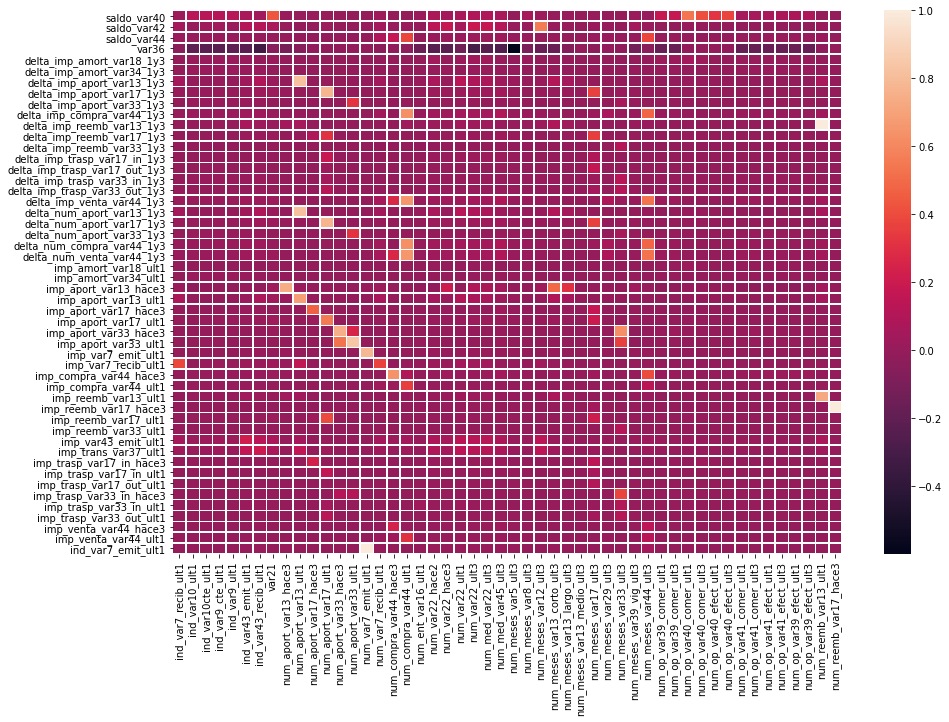

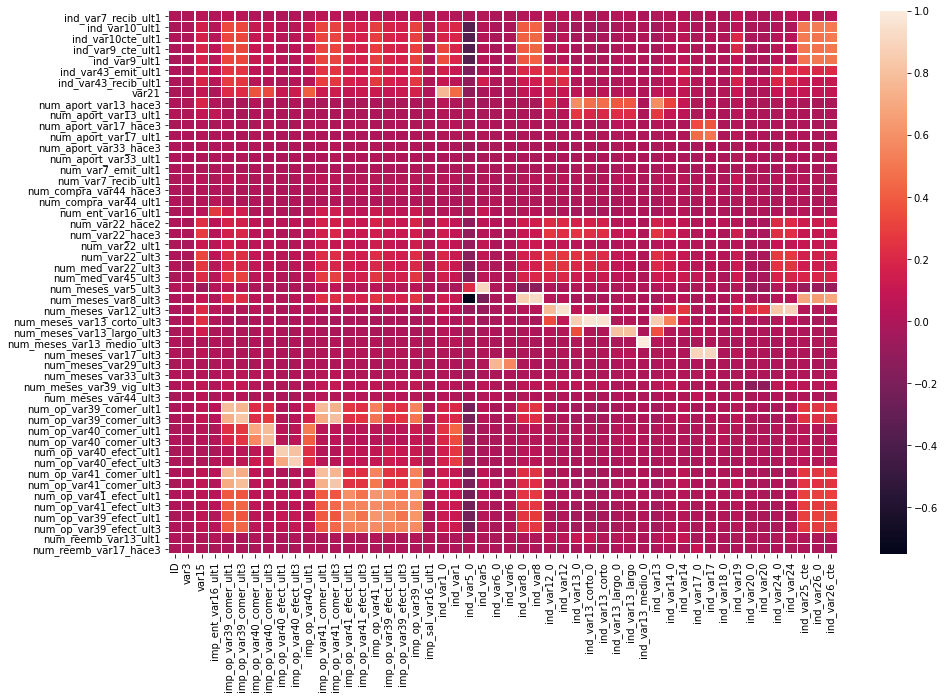

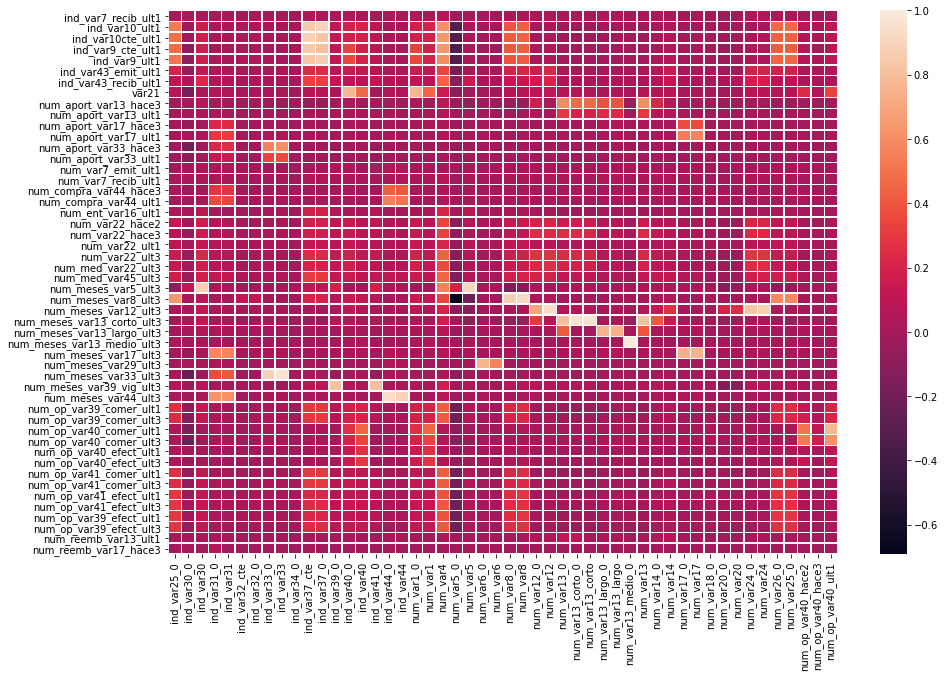

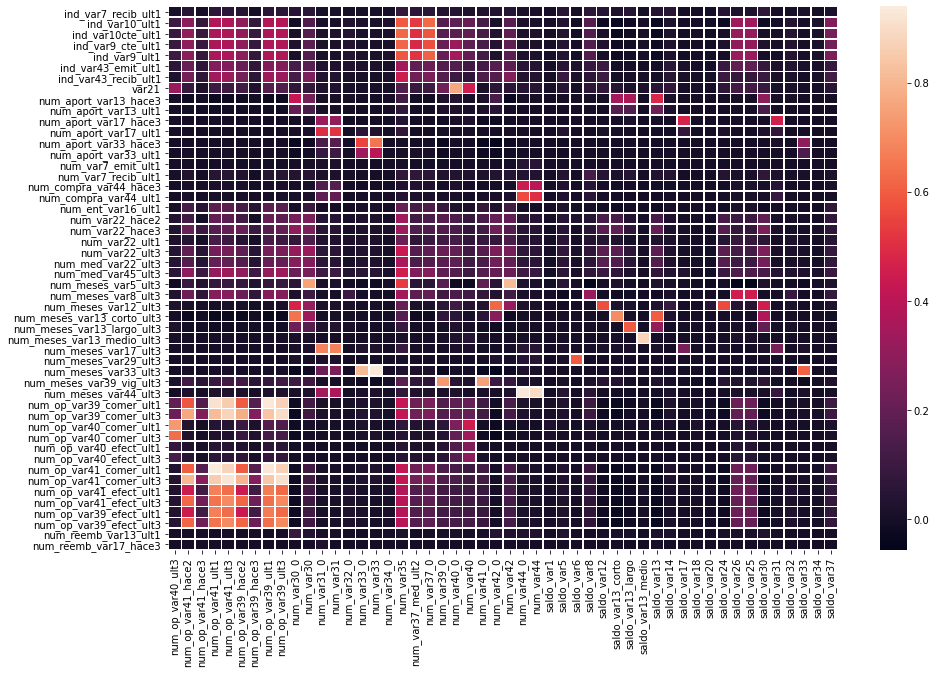

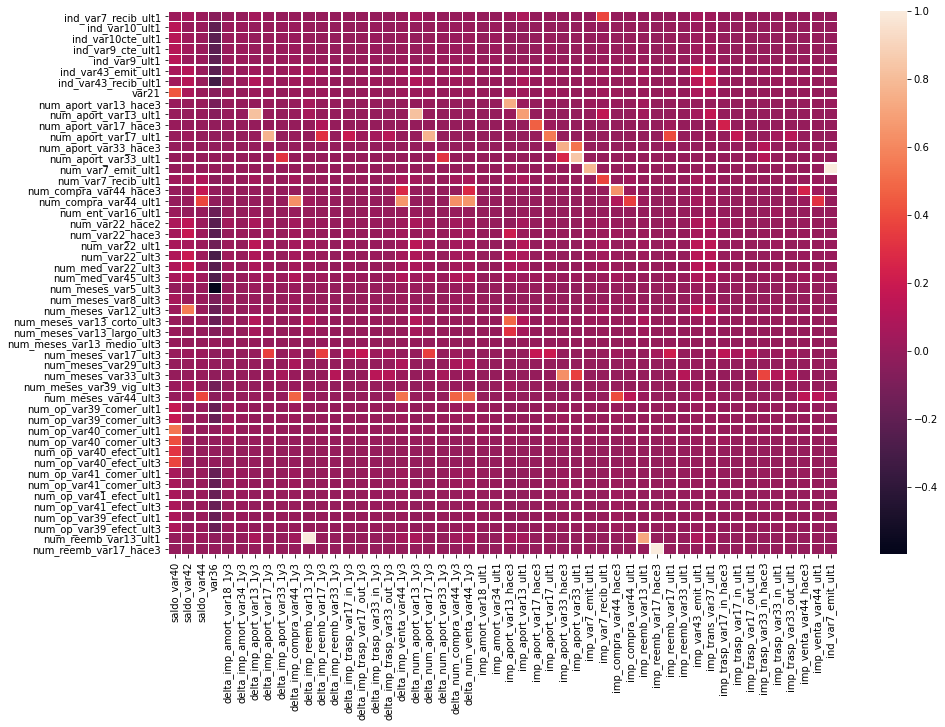

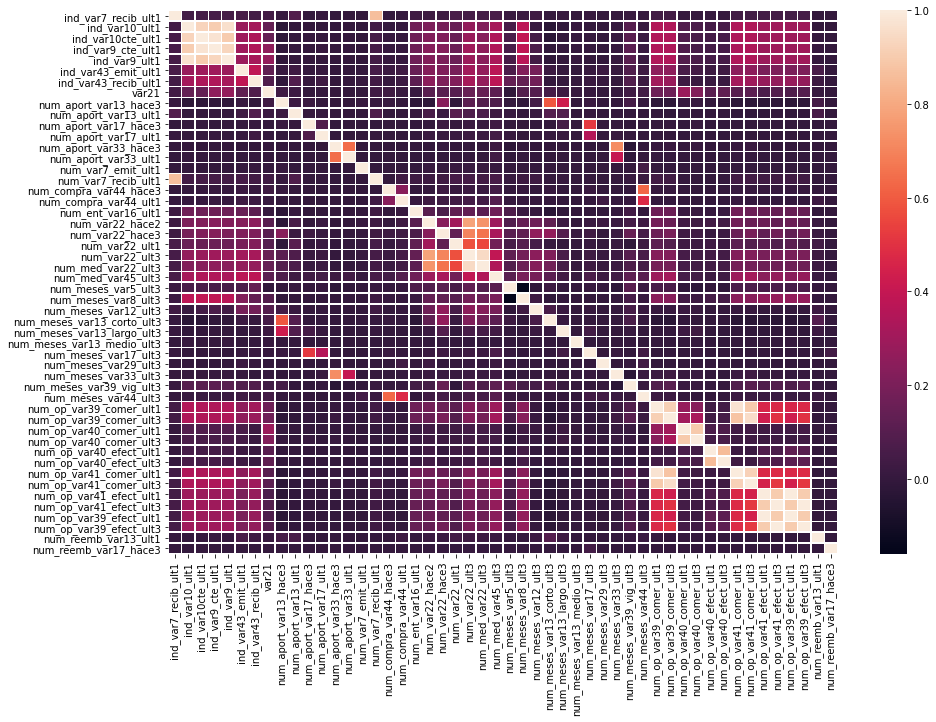

In [ ]:
for i in range(0,5):
  for j in range(0,5):
    x = i*50
    y = j*50
    corr = cor.iloc[range(x,x+50),range(y,y+50)]
    fig, a = plt.subplots(figsize = (15, 10))
    sns.heatmap(corr,linewidths=0.5,ax = a)

 **Correlation heat maps have been displayed.**

In [ ]:
col_cor = set()
for i in range(len(cor.columns)):
  for j in range(i):
    if (cor.iloc[i,j]>=0.9) and (cor.columns[j] not in col_cor):
      col_name = cor.columns[i]
      col_cor.add(col_name)
      if col_name in train_dummy:
        del train_dummy[col_name]

print("cols are: ",col_cor)

cols are:  {'num_trasp_var33_in_ult1', 'num_var34_0', 'num_var13_corto', 'ind_var9_cte_ult1', 'saldo_medio_var29_ult3', 'num_meses_var33_ult3', 'ind_var32_0', 'num_op_var39_hace3', 'num_var44_0', 'imp_reemb_var33_ult1', 'num_var13_medio_0', 'imp_aport_var17_hace3', 'num_var42_0', 'ind_var10cte_ult1', 'imp_trasp_var33_out_ult1', 'saldo_var6', 'num_var45_ult3', 'saldo_var42', 'num_op_var39_ult1', 'ind_var26_cte', 'num_var5', 'num_var18_0', 'ind_var25_0', 'num_var13', 'delta_num_aport_var13_1y3', 'num_med_var22_ult3', 'num_var24', 'num_var1_0', 'num_var5_0', 'delta_num_venta_var44_1y3', 'num_meses_var17_ult3', 'num_op_var41_ult3', 'saldo_medio_var17_hace2', 'imp_op_var41_comer_ult1', 'num_var8_0', 'num_var44', 'num_var13_0', 'num_var20', 'num_op_var39_ult3', 'num_trasp_var33_out_ult1', 'num_var8', 'num_var45_hace2', 'saldo_medio_var12_ult3', 'num_var40_0', 'delta_num_aport_var33_1y3', 'num_var20_0', 'saldo_var31', 'num_var37_0', 'num_var6_0', 'num_var41_0', 'num_op_var39_efect_ult1', 'imp

**Columns are removed having r-value>=0.9.**

In [ ]:
train_dummy.describe()

In [ ]:
train_dummy.shape

In [ ]:
z_score = []
for co in train_dummy:
  temp = stats.zscore(train_dummy[co])
  z_score.append(temp)
  temp = []

print(z_score)

**All z-scores are detected.**

In [ ]:
Q1 = train_dummy.quantile(0.25)
Q3 = train_dummy.quantile(0.75)
IQR = Q3-Q1
print("The IQR of all data: ",IQR)

The IQR of all data:  ID                         75644.00
var3                           0.00
var15                         17.00
imp_ent_var16_ult1             0.00
imp_op_var39_comer_ult1        0.00
                             ...   
saldo_medio_var33_hace3        0.00
saldo_medio_var44_hace2        0.00
saldo_medio_var44_hace3        0.00
var38                      50885.64
TARGET                         0.00
Length: 179, dtype: float64


**IQR value detected for the training data set.**

In [ ]:
type(IQR)

In [ ]:
train_d_outliers = train_dummy[~((train_dummy < (Q1 - 1.5*IQR)) | (train_dummy > (Q3 + 1.5*IQR))).any(axis=1)]
print(train_d_outliers)
type(train_d_outliers)

           ID  var3  var15  ...  saldo_medio_var44_hace3          var38  TARGET
0           1     2     23  ...                      0.0   39205.170000       0
2           4     2     23  ...                      0.0   67333.770000       0
5          13     2     23  ...                      0.0   87975.750000       0
6          14     2     27  ...                      0.0   94956.660000       0
8          20     2     45  ...                      0.0  101962.020000       0
...       ...   ...    ...  ...                      ...            ...     ...
76010  151816     2     25  ...                      0.0  165616.320000       0
76015  151829     2     48  ...                      0.0   60926.490000       0
76017  151835     2     23  ...                      0.0   74028.150000       0
76018  151836     2     25  ...                      0.0   84278.160000       0
76019  151838     2     46  ...                      0.0  117310.979016       0

[27345 rows x 179 columns]


pandas.core.frame.DataFrame

**train_d_outliers** is the data-frame where all the rows having outliers are being removed.

##PCA

Here we have two datasets:
1. Dataset with outliers.
2. Dataset without outliers.

We shall perform PCA on both the datasets.But before PCA, we need to normalize the data first.

In [ ]:
#Dropping the ID and TARGET columns from datasets.
train_dummy_drop = train_dummy.drop(columns = ['ID','TARGET'])
train_d_outliers_drop = train_d_outliers.drop(columns = ['ID','TARGET'])
train_dummy_drop.shape , train_d_outliers_drop.shape

((76020, 177), (27345, 177))

ID and TARGET columns are being dropped of the dataset before performing PCA. 

In [ ]:
#Normalizing the data with outliers
train_dummy_norm = preprocessing.normalize(train_dummy_drop)
train_dummy_norm = pd.DataFrame(train_dummy_norm)

#Normalizing the data without outliers
train_d_outliers_norm = preprocessing.normalize(train_d_outliers_drop)
train_d_outliers_norm = pd.DataFrame(train_d_outliers_norm)

print(train_dummy_norm)
print(train_d_outliers_norm)

            0         1    2         3    ...  173  174  175       176
0      0.000051  0.000587  0.0  0.000000  ...  0.0  0.0  0.0  0.999997
1      0.000041  0.000690  0.0  0.000000  ...  0.0  0.0  0.0  0.999902
2      0.000030  0.000342  0.0  0.000000  ...  0.0  0.0  0.0  0.999999
3      0.000031  0.000578  0.0  0.003046  ...  0.0  0.0  0.0  0.999977
4      0.000005  0.000103  0.0  0.000000  ...  0.0  0.0  0.0  0.310043
...         ...       ...  ...       ...  ...  ...  ...  ...       ...
76015  0.000033  0.000788  0.0  0.000000  ...  0.0  0.0  0.0  0.999998
76016  0.000015  0.000283  0.0  0.000000  ...  0.0  0.0  0.0  0.861592
76017  0.000027  0.000311  0.0  0.000000  ...  0.0  0.0  0.0  0.999999
76018  0.000024  0.000297  0.0  0.000000  ...  0.0  0.0  0.0  0.999999
76019  0.000017  0.000392  0.0  0.000000  ...  0.0  0.0  0.0  1.000000

[76020 rows x 177 columns]
            0         1    2    3    4    ...  172  173  174  175       176
0      0.000051  0.000587  0.0  0.0  0.0  ..

In [ ]:
train_dummy_norm.shape, train_d_outliers_norm.shape

((76020, 177), (27345, 177))

###PCA of dataset having outliers **"train_dummy_norm"**:

In [ ]:
pca_santander_w = PCA(n_components = 7)
PC_santander_w = pca_santander_w.fit_transform(train_dummy_norm)

In [ ]:
pca_dataFrame_w = pd.DataFrame(data = PC_santander_w, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
pca_dataFrame_w 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.072489,-0.001283,0.003229,-0.008943,0.002378,0.002404,-0.000235
1,-0.065169,-0.009548,-0.002545,-0.010897,0.001200,0.000275,0.001148
2,-0.072463,-0.001277,0.003207,-0.008868,0.002357,0.002389,-0.000264
3,-0.071685,-0.001115,0.002580,-0.005824,0.001341,0.001563,-0.001280
4,0.734058,0.328639,0.077691,0.285967,-0.047932,0.318286,0.635410
...,...,...,...,...,...,...,...
76015,-0.072490,-0.001283,0.003229,-0.008942,0.002379,0.002412,-0.000240
76016,0.295409,0.268555,-0.190793,-0.045605,-0.019528,-0.077424,0.030057
76017,-0.072465,-0.001278,0.003209,-0.008871,0.002358,0.002392,-0.000264
76018,-0.072468,-0.001279,0.003211,-0.008880,0.002361,0.002396,-0.000263


In [ ]:
#Variance ratio 
print(pca_santander_w.explained_variance_ratio_)

[0.56730005 0.14116079 0.08787656 0.03998302 0.03027305 0.02409153
 0.01990976]


###PCA of dataset without outliers **"train_d_outliers_norm"**:

In [ ]:
pca_santander_wo = PCA(n_components = 7)
PC_santander_wo = pca_santander_wo.fit_transform(train_d_outliers_norm)

In [ ]:
pca_dataFrame_wo = pd.DataFrame(data = PC_santander_wo, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
pca_dataFrame_wo

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.001784,-0.000406,-0.000012,6.932216e-06,0.000005,-0.000005,-0.000005
1,0.000713,-0.000234,-0.000105,2.362948e-06,-0.000002,0.000001,0.000048
2,0.000354,-0.000304,-0.000139,5.398731e-06,0.000006,-0.000005,-0.000011
3,-0.000716,-0.000146,0.000041,1.636247e-06,0.000008,-0.000009,0.000006
4,0.000228,-0.000285,0.000057,6.060506e-06,0.000016,-0.000015,-0.000043
...,...,...,...,...,...,...,...
27340,-0.000183,-0.000265,-0.000175,4.867892e-06,0.000007,-0.000006,-0.000015
27341,0.000924,-0.000326,0.000305,7.525711e-06,0.000024,-0.000025,-0.000070
27342,0.000577,-0.000228,-0.000117,8.562271e-07,0.000007,0.000009,0.000043
27343,0.000414,-0.000227,-0.000108,-1.821130e-06,-0.000012,0.000013,0.000029


In [ ]:
#Variance ratio 
print(pca_santander_wo.explained_variance_ratio_)

[0.49610491 0.46216621 0.03112683 0.00565434 0.00188498 0.00127877
 0.00074028]


##Data Modelling 

Before modelling, we need to add both 'ID' and 'TARGET' columns in the normalized PCA dtaset.

In [ ]:
#Adding the ID and TARGET to the "pca_dataFrame_w" dataframe again.
pca_dataFrame_w['ID'] = train_dummy['ID']
pca_dataFrame_w['TARGET'] = train_dummy['TARGET']
pca_dataFrame_w = pca_dataFrame_w[['ID','PC1','PC2','PC3','PC4','PC5','PC6','PC7','TARGET']]
pca_dataFrame_w

,ID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,TARGET
0,1,-0.072489,-0.001283,0.003229,-0.008943,0.002378,0.002404,-0.000235,0
1,3,-0.065169,-0.009548,-0.002545,-0.010897,0.001200,0.000275,0.001148,0
2,4,-0.072463,-0.001277,0.003207,-0.008868,0.002357,0.002389,-0.000264,0
3,8,-0.071685,-0.001115,0.002580,-0.005824,0.001341,0.001563,-0.001280,0
4,10,0.734058,0.328639,0.077691,0.285967,-0.047932,0.318286,0.635410,0
...,...,...,...,...,...,...,...,...,...
76015,151829,-0.072490,-0.001283,0.003229,-0.008942,0.002379,0.002412,-0.000240,0
76016,151830,0.295409,0.268555,-0.190793,-0.045605,-0.019528,-0.077424,0.030057,0
76017,151835,-0.072465,-0.001278,0.003209,-0.008871,0.002358,0.002392,-0.000264,0
76018,151836,-0.072468,-0.001279,0.003211,-0.008880,0.002361,0.002396,-0.000263,0


In [ ]:
#Adding the ID and TARGET to the "pca_dataFrame_wo" dataframe again.
pca_dataFrame_wo['ID'] = train_d_outliers['ID']
pca_dataFrame_wo['TARGET'] = train_d_outliers['TARGET']
pca_dataFrame_wo = pca_dataFrame_wo[['ID','PC1','PC2','PC3','PC4','PC5','PC6','PC7','TARGET']]
pca_dataFrame_wo

Now we will do test and train split to our training dataset before building the model.

In [ ]:
#Assigning the TARGET column to y and remaining columns to x. 
x = pca_dataFrame_w.drop(columns=['ID','TARGET'])
y = pca_dataFrame_w['TARGET']

#Splitting the  training dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.3 , random_state = 20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((53214, 7), (22806, 7), (53214,), (22806,))

###**1. Logistic regression**

In [ ]:
#importing logistic regreassion from sklearn
from sklearn.linear_model import LogisticRegression

#Building model
mlr = LogisticRegression()
mlr.fit(x_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Testing model on x_test
y_pred = mlr.predict(x_test)

In [ ]:
#Checking accuracy
confusion_matrix(y_test , y_pred)

array([[21929,     0],
       [  877,     0]])

In [ ]:
#Accuracy
print("Accuracy of the model is: ",accuracy_score(y_test, y_pred)*100,"%")

Accuracy of the model is:  96.1545207401561 %


In [ ]:
#Classification report
print("Overall report:")
print(classification_report(y_test,y_pred))

Overall report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.00      0.00      0.00       877

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now we will hypertune our logistic regression parameters and again predict the result.

In [ ]:
params_lr = [{
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    
}]

In [ ]:
mlr_random = RandomizedSearchCV(mlr,param_distributions=params_lr,scoring='roc_auc',n_jobs=-1,cv=5,verbose=True)

In [ ]:
clf_random_mlr = mlr_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [ ]:
clf_random_mlr.best_estimator_

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
mlr_hyp = LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
mlr_hyp.fit(x_train,y_train)

LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_mlr_hyp = mlr_hyp.predict(x_test)

In [ ]:
cm_mlr = confusion_matrix(y_test,y_pred_mlr_hyp) 
cm_mlr

array([[21929,     0],
       [  877,     0]])

In [ ]:
accuracy_mlr = accuracy_score(y_test,y_pred_mlr_hyp)
accuracy_mlr

0.961545207401561

In [ ]:
 print(classification_report(y_test,y_pred_mlr_hyp))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.00      0.00      0.00       877

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_mlr = f1_score(y_test,y_pred_mlr_hyp)
f1_mlr

0.0

Here we can observe one thing that even if after hypertuning the parameters, the evaluated parameters remain unchanged.

Let's see the perrformance using ROC curve.

In [ ]:
y_prob_mlr = mlr_hyp.predict_proba(x_test)[:,1]
y_prob_mlr

array([0.04453807, 0.04453129, 0.04454424, ..., 0.04455491, 0.03844087,
       0.02928981])

In [ ]:
fpr_mlr , tpr_mlr , thr_mlr = roc_curve(y_test,y_prob_mlr)
fpr_mlr , tpr_mlr , thr_mlr

(array([0.00000000e+00, 4.56017146e-05, 3.19212002e-04, ...,
        9.98996762e-01, 9.98996762e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99885975, 1.        ,
        1.        ]),
 array([1.13816720e+00, 1.38167199e-01, 6.07245025e-02, ...,
        2.89666307e-04, 2.73977936e-04, 1.02024163e-04]))

In [ ]:
auc_mlr = auc(fpr_mlr,tpr_mlr)
print("Area under the ROC curve is: ",auc_mlr)

Area under the ROC curve is:  0.6684735067817341


Text(0, 0.5, 'True Positive Rate')

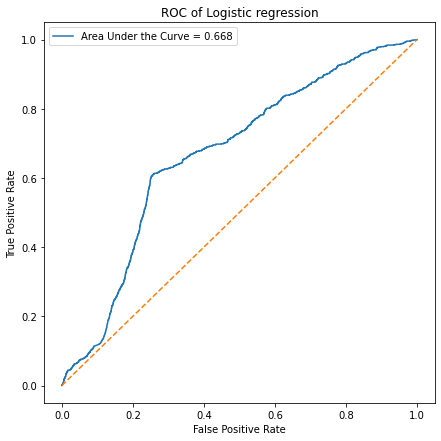

In [ ]:
#Now let's draw the ROC
plt.figure(figsize=(7,7))
plt.title("ROC of Logistic regression")
plt.plot(fpr_mlr,tpr_mlr,linestyle = 'solid',label = 'Area Under the Curve = %0.3f' % auc_mlr)
plt.legend(loc = 'upper left')
plt.plot([0,1],linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

###**2. Decision tree**

In [ ]:
#importing decision tree
from sklearn.tree import DecisionTreeClassifier

#Building model
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Testing model on x_test
y_pred_dt = DT.predict(x_test)

In [ ]:
#Confusion matrix
confusion_matrix(y_test,y_pred_dt)

array([[21619,   310],
       [  851,    26]])

In [ ]:
#Accuracy
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.9490923441199685

In [ ]:
#Classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     21929
           1       0.08      0.03      0.04       877

    accuracy                           0.95     22806
   macro avg       0.52      0.51      0.51     22806
weighted avg       0.93      0.95      0.94     22806



In [ ]:
f1_dt = f1_score(y_test,y_pred_dt)
f1_dt

0.0428689200329761

Now we will see the model performance using ROC.

In [ ]:
y_prob_dt = DT.predict_proba(x_test)[:,1]
y_prob_dt

array([0.01648952, 0.        , 0.01648952, ..., 0.        , 1.        ,
       0.        ])

In [ ]:
fpr_dt , tpr_dt , thr_dt = roc_curve(y_test,y_prob_dt)
fpr_dt , tpr_dt , thr_dt

(array([0.        , 0.01413653, 0.01477496, 0.01491176, 0.01500296,
        0.01518537, 0.01573259, 0.0160518 , 0.01623421, 0.01814948,
        0.01824069, 0.0186967 , 0.01878791, 0.01892471, 0.24396917,
        0.24437959, 0.2446988 , 0.24506361, 0.24565644, 0.24647727,
        0.24684208, 0.24875735, 0.25313512, 0.25413836, 0.25591682,
        0.44552875, 0.44721602, 1.        ]),
 array([0.        , 0.02964652, 0.02964652, 0.03078677, 0.03078677,
        0.03078677, 0.03420753, 0.03420753, 0.03534778, 0.04561003,
        0.04561003, 0.04675029, 0.04675029, 0.04675029, 0.56556442,
        0.56556442, 0.56556442, 0.56556442, 0.56556442, 0.56556442,
        0.56556442, 0.56556442, 0.56784493, 0.56784493, 0.56784493,
        0.64994299, 0.64994299, 1.        ]),
 array([2.        , 1.        , 0.5       , 0.33333333, 0.25      ,
        0.23076923, 0.21212121, 0.2       , 0.1875    , 0.16842105,
        0.16666667, 0.14285714, 0.1       , 0.09090909, 0.08904859,
        0.08333333, 0.07

In [ ]:
auc_dt = auc(fpr_dt,tpr_dt)
print("Area under the curve : ",auc_dt)

Area under the curve :  0.6486382168471245


Text(0, 0.5, 'True Positive Rate')

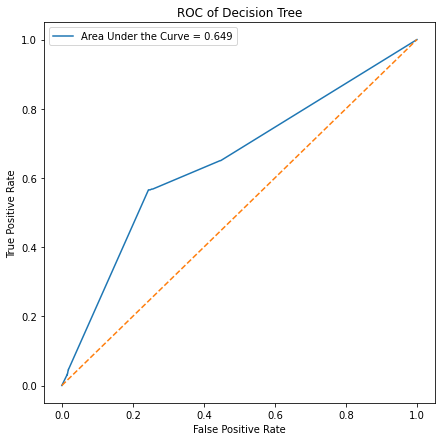

In [ ]:
#Now let's draw the ROC
plt.figure(figsize=(7,7))
plt.title("ROC of Decision Tree")
plt.plot(fpr_dt,tpr_dt,linestyle = 'solid',label = 'Area Under the Curve = %0.3f' % auc_dt)
plt.legend(loc = 'upper left')
plt.plot([0,1],linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Now we will hypertune our Decision tree parameters and again predict the result.

In [ ]:
params_dt = [
    {'splitter' : ['best', 'random'],
     'max_depth' : np.linspace(1, 32, 32, endpoint=True),
     'min_samples_split' : np.linspace(1, 10, 10, endpoint=True),
     'min_samples_leaf' : np.linspace(0.1, 0.5, 10, endpoint=True),
     'max_features' : list(range(1,x_train.shape[1])),
    }
]

In [ ]:
dt_random = RandomizedSearchCV(DT,param_distributions=params_dt,scoring='roc_auc',n_jobs=-1,cv=5,verbose=True)

In [ ]:
clf_random_dt = dt_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


In [ ]:
clf_random_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2.0, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.32222222222222224,
                       min_samples_split=1.0, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
DT_hyp = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5.0, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.3666666666666667,
                       min_samples_split=1.0, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='random')

In [ ]:
DT_hyp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5.0, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.3666666666666667,
                       min_samples_split=1.0, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='random')

In [ ]:
y_pred_dt_hyp = DT_hyp.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_dt_hyp)

array([[21929,     0],
       [  877,     0]])

In [ ]:
accuracy_dt_hyp = accuracy_score(y_test,y_pred_dt_hyp)
accuracy_dt_hyp

0.961545207401561

In [ ]:
print(classification_report(y_test,y_pred_dt_hyp))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.00      0.00      0.00       877

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_dt_hyp = f1_score(y_test,y_pred_dt_hyp)
f1_dt_hyp

0.0

Now let's see model performance after hyperparameter tuning by ROC.

In [ ]:
y_prob_dt_hyp = DT_hyp.predict_proba(x_test)[:,1]
y_prob_dt_hyp

array([0.04004585, 0.04004585, 0.04004585, ..., 0.04004585, 0.04004585,
       0.04004585])

In [ ]:
fpr_dt_hyp , tpr_dt_hyp , thr_dt_hyp = roc_curve(y_test,y_prob_dt_hyp)

In [ ]:
auc_dt_hyp = auc(fpr_dt_hyp,tpr_dt_hyp)
auc_dt_hyp

0.5

Text(0, 0.5, 'True Positive Rate')

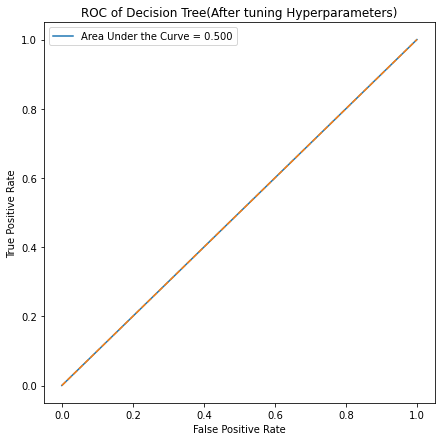

In [ ]:
#Now let's draw the ROC
plt.figure(figsize=(7,7))
plt.title("ROC of Decision Tree(After tuning Hyperparameters)")
plt.plot(fpr_dt_hyp,tpr_dt_hyp,linestyle = 'solid',label = 'Area Under the Curve = %0.3f' % auc_dt_hyp)
plt.legend(loc = 'upper left')
plt.plot([0,1],linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

###**3. Naive Bayes**

In [ ]:
#importing multinomial naive bayes
from sklearn.naive_bayes import GaussianNB

#Building model
GNB = GaussianNB()
GNB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Testing model on x_test
y_pred_nb = GNB.predict(x_test)

In [ ]:
#Confusion matrix
confusion_matrix(y_test,y_pred_nb)

array([[ 2982, 18947],
       [   35,   842]])

In [ ]:
#Accuracy
accuracy_nb = accuracy_score(y_test,y_pred_nb)
accuracy_nb

0.16767517320003508

In [ ]:
#Classification report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.14      0.24     21929
           1       0.04      0.96      0.08       877

    accuracy                           0.17     22806
   macro avg       0.52      0.55      0.16     22806
weighted avg       0.95      0.17      0.23     22806



In [ ]:
f1_nb = f1_score(y_test,y_pred_nb)
f1_nb

0.08148649956450207

Now let's go for ROC.

In [ ]:
y_prob_nb = GNB.predict_proba(x_test)[:,1]
y_prob_nb

array([0.85896886, 0.85897879, 0.85896025, ..., 0.85894269, 0.7793368 ,
       0.02426934])

In [ ]:
fpr_nb , tpr_nb , thr_nb = roc_curve(y_test,y_prob_nb)
fpr_nb , tpr_nb , thr_nb

(array([0.00000000e+00, 4.56017146e-05, 4.56017146e-05, ...,
        9.92430115e-01, 9.98723152e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00114025, ..., 1.        , 1.        ,
        1.        ]),
 array([1.86065489e+000, 8.60654886e-001, 8.60568294e-001, ...,
        1.36473801e-131, 4.36259965e-321, 0.00000000e+000]))

In [ ]:
auc_nb = auc(fpr_nb,tpr_nb)
auc_nb

0.5119185046922188

Text(0, 0.5, 'True Positive Rate')

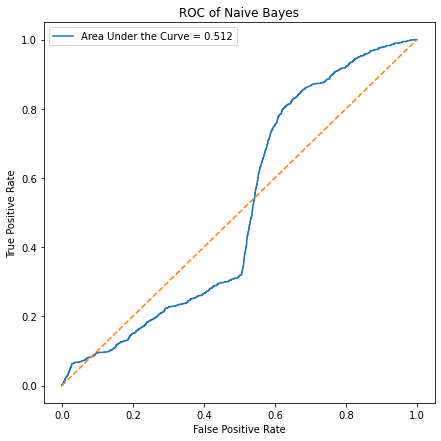

In [ ]:
#Now let's draw the ROC
plt.figure(figsize=(7,7))
plt.title("ROC of Naive Bayes")
plt.plot(fpr_nb,tpr_nb,linestyle = 'solid',label = 'Area Under the Curve = %0.3f' % auc_nb)
plt.legend(loc = 'upper left')
plt.plot([0,1],linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

We will not do hyperparameter tuning for this model, because for this dataset Gaussian naive bayes is not appropriate.

If in case we need to do tuning of hyperparameters, below are the parameters with which we can do tuning using RandomSearchCV or GridSearchCV.

In [ ]:
params_nb = [
             {C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
              gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
              kernel=['rbf','linear']}
]

###**4. Random Forest**

In [ ]:
#importing required package 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Building model
RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Testing model on x_test
y_pred_rf = RF.predict(x_test)

In [ ]:
#Confusion matrix
confusion_matrix(y_test, y_pred_rf)

array([[21915,    14],
       [  873,     4]])

In [ ]:
#Accuracy
accuracy_score(y_test, y_pred_rf)

0.9611067263000964

In [ ]:
#Overall score
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.22      0.00      0.01       877

    accuracy                           0.96     22806
   macro avg       0.59      0.50      0.49     22806
weighted avg       0.93      0.96      0.94     22806



Now we will do hyperparameter tuning of random forest classifier.

In [ ]:
params_rf = [
    {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}
]

In [ ]:
rf_random = RandomizedSearchCV(RF,param_distributions=params_rf,scoring='roc_auc',n_jobs=-1,cv=2,verbose=True)

In [ ]:
clf_random_rf = rf_random.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 17.1min finished


In [ ]:
y_pred_rf_hyp = clf_random_rf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_rf_hyp)

array([[21929,     0],
       [  877,     0]])

In [ ]:
accuracy_rf = accuracy_score(y_test,y_pred_rf_hyp)
accuracy_rf

0.961545207401561

In [ ]:
print(classification_report(y_test,y_pred_rf_hyp))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.00      0.00      0.00       877

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_rf = f1_score(y_test,y_pred_rf_hyp)
f1_rf

0.0

Now let's observe the model performance using ROC.

In [ ]:
y_prob_rf_hyp = clf_random_rf.predict_proba(x_test)[:,1]
y_prob_rf_hyp

array([0.01747313, 0.0199469 , 0.01661803, ..., 0.29820142, 0.02368774,
       0.0177906 ])

In [ ]:
fpr_rf,tpr_rf,thr_rf = roc_curve(y_test,y_prob_rf_hyp)
fpr_rf,tpr_rf,thr_rf

(array([0.00000000e+00, 4.56017146e-05, 4.56017146e-05, ...,
        9.99315974e-01, 9.99817593e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.0022805, ..., 1.       , 1.       ,
        1.       ]),
 array([1.49789095e+00, 4.97890951e-01, 4.33261583e-01, ...,
        1.15922122e-04, 1.05821112e-04, 7.84238514e-05]))

In [ ]:
auc_rf = auc(fpr_rf,tpr_rf)
auc_rf

0.7260689663276835

Text(0, 0.5, 'True Positive Rate')

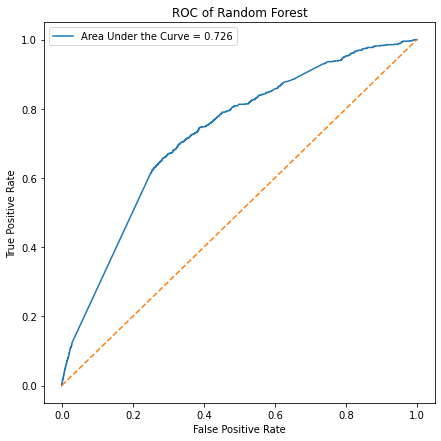

In [ ]:
#Now let's draw the ROC
plt.figure(figsize=(7,7))
plt.title("ROC of Random Forest")
plt.plot(fpr_rf,tpr_rf,linestyle = 'solid',label = 'Area Under the Curve = %0.3f' % auc_rf)
plt.legend(loc = 'upper left')
plt.plot([0,1],linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

###**5. SVM**

In [ ]:
#importing packages
from sklearn.svm import SVC

In [ ]:
#Building model
clf = SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Applying model on x_test
y_pred_svm = clf.predict(x_test)  

In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred_svm)

array([[21929,     0],
       [  877,     0]])

In [ ]:
#Accuracy
accuracy_score(y_test,y_pred_svm)

0.961545207401561

In [ ]:
#Overall score
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.00      0.00      0.00       877

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now we will do the hyperparameter tuning of SVM algo.

In [ ]:
params_svm = [
              {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
]

In [ ]:
random_svm = RandomizedSearchCV(clf,param_distributions=params_svm,scoring='roc_auc',n_jobs=-1,cv=5,verbose=True)

In [ ]:
clf_random_svm = random_svm.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.2min finished


In [ ]:
clf_random_svm.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_hyp = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_hyp.fit(x_train,y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_svm_hyp = svm_hyp.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_svm_hyp)

array([[21929,     0],
       [  877,     0]])

In [ ]:
accuracy_svm = accuracy_score(y_test,y_pred_svm_hyp)
accuracy_svm

0.961545207401561

In [ ]:
print(classification_report(y_test,y_pred_svm_hyp))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.00      0.00      0.00       877

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_svm = f1_score(y_test,y_pred_svm_hyp)
f1_svm

0.0

Now let's see the model performance using ROC.

In [ ]:
y_prob_svm = svm_hyp.predict_proba(x_test)[:,1]
y_prob_svm

array([0.05203565, 0.05202499, 0.05204509, ..., 0.05206309, 0.04087775,
       0.02595406])

In [ ]:
fpr_svm, tpr_svm, thr_svm = roc_curve(y_test,y_prob_svm)
fpr_svm, tpr_svm, thr_svm

(array([0.        , 0.        , 0.        , ..., 0.99895116, 0.99895116,
        1.        ]),
 array([0.        , 0.00114025, 0.0022805 , ..., 0.99885975, 1.        ,
        1.        ]),
 array([1.08136779e+00, 8.13677940e-02, 5.52087921e-02, ...,
        1.20397704e-04, 1.13765816e-04, 4.98160081e-05]))

In [ ]:
auc_svm = auc(fpr_svm,tpr_svm)
auc_svm

0.6543898305992497

Text(0, 0.5, 'True Positive Rate')

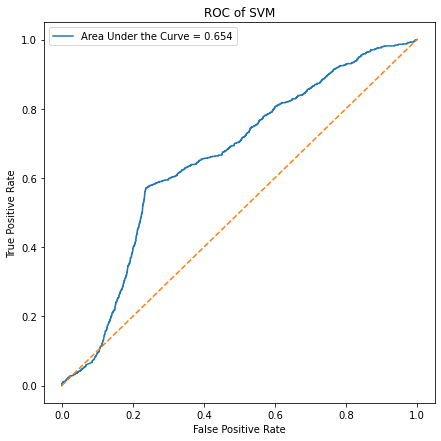

In [ ]:
#Now let's draw the ROC
plt.figure(figsize=(7,7))
plt.title("ROC of SVM")
plt.plot(fpr_svm,tpr_svm,linestyle = 'solid',label = 'Area Under the Curve = %0.3f' % auc_svm)
plt.legend(loc = 'upper left')
plt.plot([0,1],linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Here also after tuning the parameters, still the model performance remains unchanged.

###**6. XGBoost**

In [ ]:
#Setting parameters for xgboost
params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
#importing necessary pacakges
import xgboost

In [ ]:
classifier = xgboost.XGBClassifier()

In [ ]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

Here, we have done random search to find out the exact parameters for xgboost. In this method we passed classifier, all the selected parameters. 

In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
print(random_search.best_estimator_)
print("====================================================================================================")
print(random_search.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
{'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.5}


All above parameters are suitable for our dataset and it will not make the model overfitting.

In [ ]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(classifier,x_train,y_train,cv=10)
score_train

array([0.95997745, 0.95997745, 0.95997745, 0.95978955, 0.95996993,
       0.95996993, 0.95996993, 0.95996993, 0.95996993, 0.95996993])

In [ ]:
score_train.mean()

0.9599541491841936

In [ ]:
classifier.fit(x_train,y_train)
y_pred_xgb = classifier.predict(x_test)

We have built the model and predicted the output for test data.

In [ ]:
#Accuracy
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
accuracy_xgb

0.961545207401561

In [ ]:
#confusion matrix
confusion_matrix(y_test,y_pred_xgb)

array([[21929,     0],
       [  877,     0]])

In [ ]:
#Overall score
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.00      0.00      0.00       877

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
probability_xgb = classifier.predict_proba(x_test)

In [ ]:
print("Probability of satisfaction:",probability_xgb[:,0])
print("============================================================================================================")
print(print("Probability of dis-satisfaction:",probability_xgb[:,1]))

Probability of satisfaction: [0.9806173  0.9781391  0.98346156 ... 0.75248617 0.98025    0.9799527 ]
Probability of dis-satisfaction: [0.01938269 0.0218609  0.01653846 ... 0.24751383 0.01974997 0.02004729]
None


In [ ]:
f1_xgb = f1_score(y_test,y_pred_xgb)
f1_xgb

0.0

Now let's go for ROC.

In [ ]:
y_prob_xgb = probability_xgb[:,1]
y_prob_xgb

array([0.02062891, 0.02233878, 0.01751767, ..., 0.21743177, 0.0203754 ,
       0.02198105], dtype=float32)

In [ ]:
fpr_xgb,tpr_xgb,thr_xgb = roc_curve(y_test,y_prob_xgb)
fpr_xgb,tpr_xgb,thr_xgb

(array([0.00000000e+00, 4.56017146e-05, 4.56017146e-05, ...,
        9.99771991e-01, 9.99954398e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00114025, ..., 1.        , 1.        ,
        1.        ]),
 array([1.3201859 , 0.32018596, 0.32014713, ..., 0.00207852, 0.00195553,
        0.00192733], dtype=float32))

In [ ]:
auc_xgb = auc(fpr_xgb,tpr_xgb)
auc_xgb

0.7503645407306767

Text(0, 0.5, 'True Positive Rate')

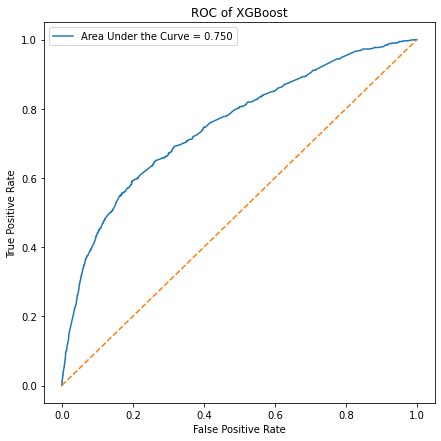

In [ ]:
#Now let's draw the ROC
plt.figure(figsize=(7,7))
plt.title("ROC of XGBoost")
plt.plot(fpr_xgb,tpr_xgb,linestyle = 'solid',label = 'Area Under the Curve = %0.3f' % auc_xgb)
plt.legend(loc = 'upper left')
plt.plot([0,1],linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

##Model Comparison

In [ ]:
table = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree','Decision Tree(Hyp)','Naive Bayes','Random Forest','SVM','XGBoost'],
    'Accuracy' : [accuracy_mlr,accuracy_dt,accuracy_dt_hyp,accuracy_nb,accuracy_rf,accuracy_svm,accuracy_xgb],
    'AUC' : [auc_mlr,auc_dt,auc_dt_hyp,auc_nb,auc_rf,auc_svm,auc_xgb],
    'f1-Score' : [f1_mlr,f1_dt,f1_dt_hyp,f1_nb,f1_rf,f1_svm,f1_xgb]
})


table.style.background_gradient(cmap='hot_r', text_color_threshold=0.5)

,Model,Accuracy,AUC,f1-Score
0,Logistic Regression,0.961545,0.668474,0.000000
1,Decision Tree,0.949092,0.648638,0.042869
2,Decision Tree(Hyp),0.961545,0.500000,0.000000
3,Naive Bayes,0.167675,0.511919,0.081486
4,Random Forest,0.961545,0.726069,0.000000
5,SVM,0.961545,0.654390,0.000000
6,XGBoost,0.961545,0.750365,0.000000
